# Linear Regression with One Variable

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv("E:\\Machine Learning\\1\\ex1data1.csv")
data.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0,0.5,u'Profit in $10,000s')

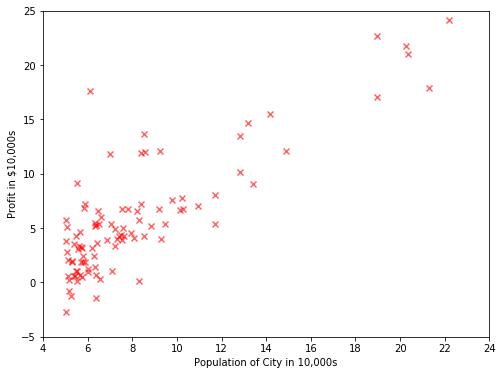

In [4]:
plt.figure(num = 1, figsize = (8, 6))
plt.scatter(data["X"], data["Y"], marker = "x", color = "red", alpha = 0.6)
plt.xlim((4, 24))
plt.ylim((-5, 25))
plt.xticks(range(4, 26, 2))
plt.yticks(range(-5, 30, 5))
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

In [41]:
X_mat = np.transpose(np.mat(data["X"]))
Y_mat = np.transpose(np.mat(data["Y"]))

theta_initial = np.transpose(np.mat([0, 0]))

In [94]:
def costFunction(X, Y, theta):
    m = np.shape(X)[0]
    ones = np.transpose(np.mat(np.ones(m)))
    X_ones = np.hstack((ones, X))
    
    Y_predict = X_ones * theta
    
    J = 1/(2*m) * sum(np.power(Y_predict - Y, 2))
    
    
    return J[0, 0]

In [95]:
costFunction(X_mat, Y_mat, theta_initial)

32.072733877455654

In [96]:
theta_initial = np.transpose(np.mat([-1, 2]))

costFunction(X_mat, Y_mat, theta_initial)

54.24245508201238

In [101]:
def gradientDesc(X, Y, theta, alpha, iterations):
    m = np.shape(X)[0]
    n = len(theta)
    ones = np.transpose(np.mat(np.ones(m)))
    X_ones = np.hstack((ones, X))
    
    theta_list = [theta]
    J_list = [costFunction(X, Y, theta)]
    
    
    G_theta = np.transpose(np.mat(np.zeros(n)))
    
    while len(J_list) < iterations:
        for j in range(0, n, 1):
            G_theta[j, :] = 1/m * sum(np.multiply(X_ones * theta - Y, X_ones[:, j]))
    
        theta = theta - alpha * G_theta
        theta_list.append(theta)
        J_list.append(costFunction(X, Y, theta))
    
    
    return theta, theta_list, J_list

In [103]:
theta_initial = np.transpose(np.mat([0, 0]))

theta_optimum = gradientDesc(X_mat, Y_mat, theta_initial, 0.01, 1500)[0]
theta_list = gradientDesc(X_mat, Y_mat, theta_initial, 0.01, 1500)[1]
J_list = gradientDesc(X_mat, Y_mat, theta_initial, 0.01, 1500)[2]

In [104]:
theta_optimum

matrix([[-3.62981201],
        [ 1.16631419]])

In [108]:
predict1 = (np.mat([1, 3.5]) * theta_optimum)[0, 0]
predict2 = (np.mat([1, 7]) * theta_optimum)[0, 0]

predict1, predict2

(0.4522876458065772, 4.53438729663793)

Text(0,0.5,u'Profit in $10,000s')

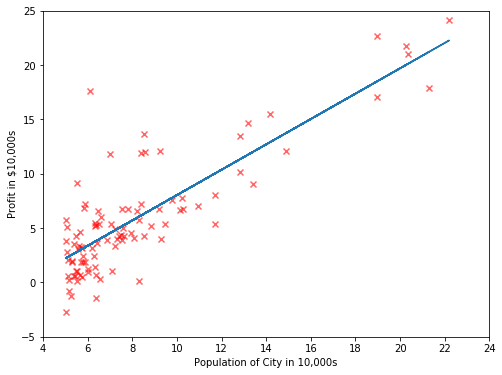

In [150]:
ones = np.transpose(np.mat(np.ones(np.shape(X_mat)[0])))
X_ones = np.hstack((ones, X))
Y_predict = X_ones * theta_optimum


plt.figure(num = 1, figsize = (8, 6))

plt.scatter(data["X"], data["Y"], marker = "x", color = "red", alpha = 0.6)
plt.plot(data["X"], Y_predict)
plt.xlim((4, 24))
plt.ylim((-5, 25))
plt.xticks(range(4, 26, 2))
plt.yticks(range(-5, 30, 5))
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

In [129]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(0, len(theta0_vals), 1):
    for j in range(0, len(theta1_vals), 1):
        t = np.transpose(np.mat([theta0_vals[i], theta1_vals[j]]))
        J_vals[i, j] = costFunction(X_mat, Y_mat, t)

J_vals = np.transpose(J_vals)


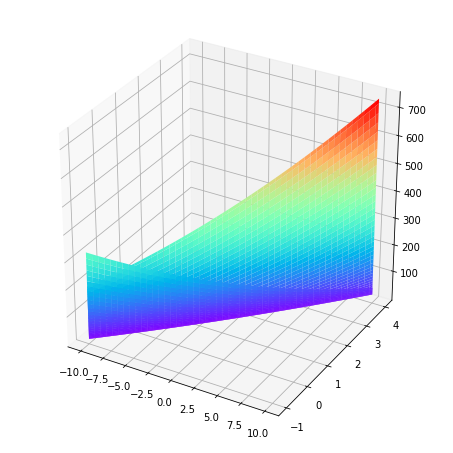

In [134]:
fig = plt.figure(figsize = (6, 6))

ax = Axes3D(fig)
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap = plt.get_cmap("rainbow"))

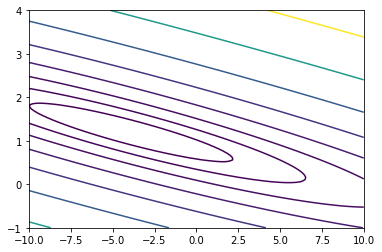

In [143]:
plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(-2, 3, 20))

Questions: 1) logspace? 

2) theta0_vals = np.linspace(-10, 10, 100) --- Why not np.linspace(min(theta0_list), max(theta0_list))?